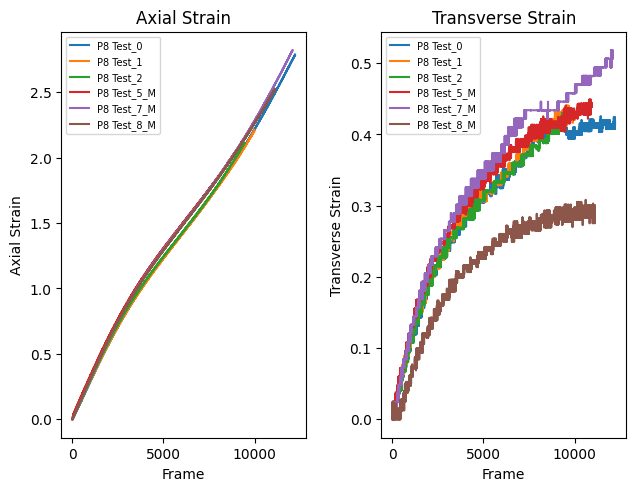

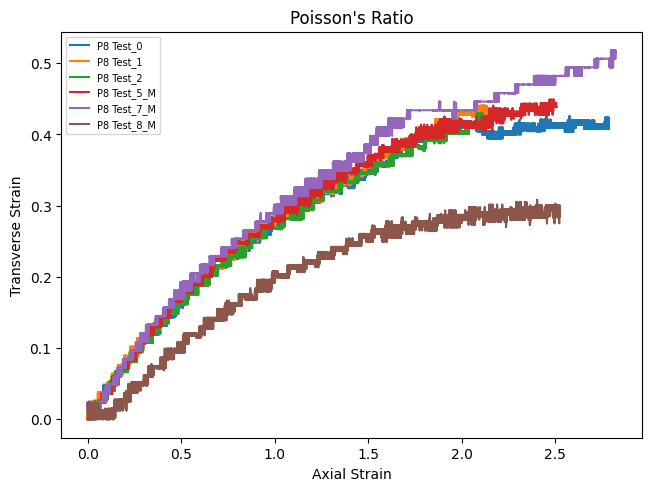

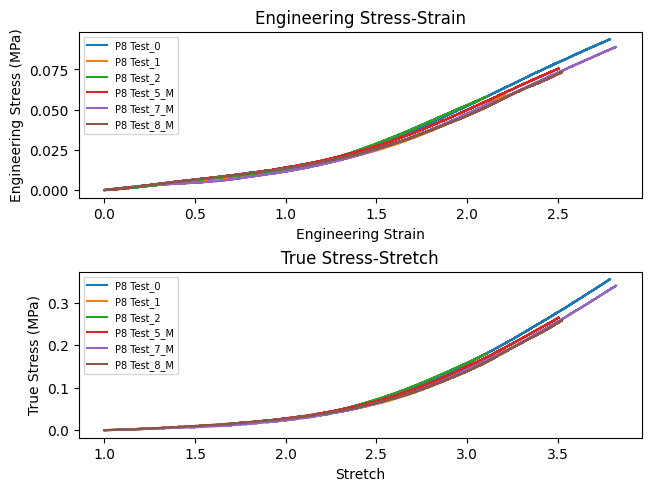

In [2]:
"""Overlay the individual modeling datasets on a plot"""
from pvc_tensile_experiment.Functions import TensileDataReader
import os; import matplotlib.pyplot as plt
import numpy as np

# the desired plasticizer ratio 
plastiRatio = 'P8'

# list the processed file names
fileNames = [i for i in os.listdir('Data/Tensile Data/Best data') if i.find(f'{plastiRatio}') != -1]

# preallocate the suplots
fig, axs = plt.subplots(1,2, layout = "constrained")
fig, axs1 = plt.subplots(1,1, layout = "constrained")
fig, axs2 = plt.subplots(2,1, layout = "constrained")

for name in fileNames:
    # read the processed data files 
    axDist, axStrain, transDist, transStrain, stress = TensileDataReader(name)
    
    # find true strain and stress from engineering strain
    stretch = 1 + axStrain
    stressTrue = stress*stretch

    # remove csv from the name
    name = name.removesuffix('.csv').removeprefix('PVC ')

    # plot the engineering axial and transverse strain per frame
    axs[0].plot(axStrain, label = f'{name}')
    axs[1].plot(transStrain, label = f'{name}')
    axs[0].set_title('Axial Strain')
    axs[1].set_title('Transverse Strain')
    axs[0].set_xlabel('Frame')
    axs[1].set_xlabel('Frame')
    axs[0].set_ylabel('Axial Strain')
    axs[1].set_ylabel('Transverse Strain')
    axs[0].legend(fontsize = 7)
    axs[1].legend(fontsize = 7)

    # plot poissons ratio 
    axs1.plot(axStrain, transStrain, label = f'{name}')
    axs1.set_title("Poisson's Ratio")
    axs1.set_xlabel('Axial Strain')
    axs1.set_ylabel('Transverse Strain')
    axs1.legend(fontsize = 7)

    # plot engineering stress-strain and true stress-strain
    axs2[0].plot(axStrain, stress, label = f'{name}')   
    axs2[1].plot(stretch, stressTrue, label = f'{name}')
    axs2[0].set_xlabel('Engineering Strain')
    axs2[1].set_xlabel('Stretch')
    axs2[0].set_ylabel('Engineering Stress (MPa)')
    axs2[1].set_ylabel('True Stress (MPa)')
    axs2[0].set_title('Engineering Stress-Strain')
    axs2[1].set_title('True Stress-Stretch')
    axs2[0].legend(fontsize = 7)
    axs2[1].legend(fontsize = 7)

plt.show()


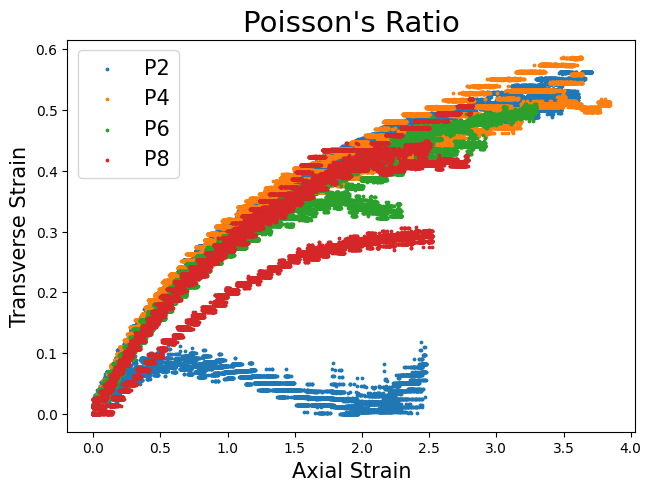

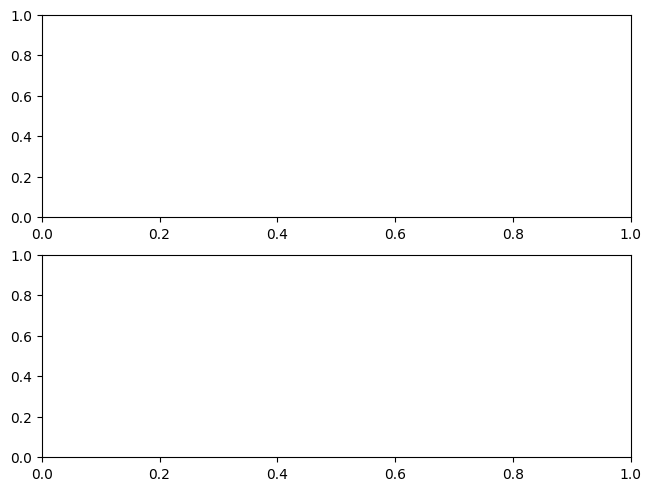

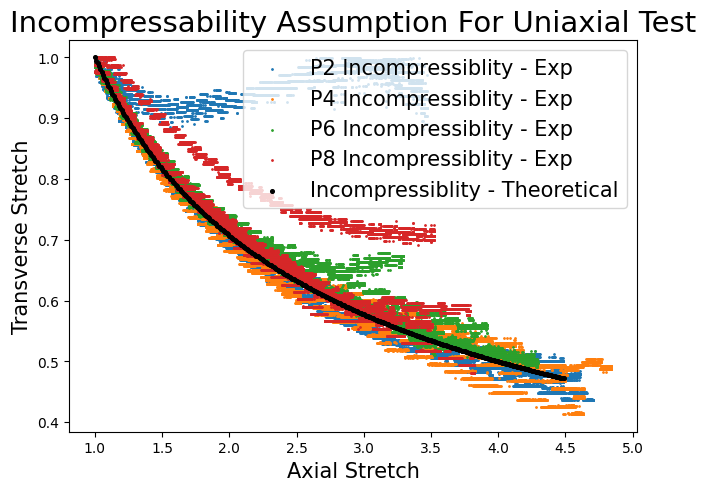

In [3]:
"""Overlay the all modeling datasets to compare platicizer"""
from pvc_tensile_experiment.Functions import TensileDataCompile
import matplotlib.pyplot as plt; import numpy as np

# preallocate the suplots
fig, axs1 = plt.subplots(1,1, layout = "constrained")
fig, axs2 = plt.subplots(2,1, layout = "constrained")
fig, axs3 = plt.subplots(1,1, layout = "constrained")


# the desired plasticizer ratio 
for plastiRatio in ['P2', 'P4', 'P6', 'P8']:

    # read the processed data files 
    _, axStrain, _, transStrain, stress = TensileDataCompile(plastiRatio)

    # find true strain and stress from engineering strain
    stretch = 1 + axStrain
    stretch2 = 1 + transStrain
    stressTrue = stress*stretch
    
    # define marker size
    size = 3

    # plot poissons ratio 
    axs1.scatter(axStrain, transStrain, label = f'{plastiRatio}', s = size)
    axs1.set_title("Poisson's Ratio", fontsize = 21)
    axs1.set_xlabel('Axial Strain', fontsize = 15)
    axs1.set_ylabel('Transverse Strain', fontsize = 15)
    axs1.legend(fontsize = 15)

    # # plot engineering stress-strain and true stress-strain
    # axs2[0].scatter(axStrain, stress, s = size, label = f'{plastiRatio}')   
    # axs2[1].scatter(stretch, stressTrue, label = f'{plastiRatio}', s = size)
    # axs2[0].set_xlabel('Engineering Strain', fontsize = 15)
    # axs2[1].set_xlabel('Stretch', fontsize = 15)
    # axs2[0].set_ylabel('Engineering Stress (MPa)', fontsize = 15)
    # axs2[1].set_ylabel('True Stress (MPa)', fontsize = 15)
    # axs2[0].set_title('Engineering Stress', fontsize = 21)
    # axs2[1].set_title('True Stress', fontsize = 21)
    # axs2[0].legend(fontsize = 15)
    # axs2[1].legend(fontsize = 15)

    # plot the incompressability conditiion
    axs3.scatter(stretch, -stretch2 + 2, label = f'{plastiRatio} Incompressiblity - Exp', s = 1)
    axs3.set_title("Incompressability Assumption For Uniaxial Test", fontsize = 21)
    axs3.set_xlabel('Axial Stretch', fontsize = 15)
    axs3.set_ylabel('Transverse Stretch', fontsize = 15)

# plot the ideal incompressability condition
stretch = np.arange(1.0, 4.5, 0.01)
axs3.scatter(stretch, np.sqrt(1/stretch), label = 'Incompressiblity - Theoretical', s = 7, c = 'k')
axs3.legend(fontsize = 15)
plt.show()

In [4]:
"""Combine modeling datasets into one csv"""
from pvc_tensile_experiment.Functions import *; import numpy as np


# the desired plasticizer ratio 
for plastiRatio in ['P2', 'P4', 'P6', 'P8']:

    # compile all the data  
    _, axStrain, _, transStrain, stress = TensileDataCompile(plastiRatio)

    # identify every 25th iteration
    index = np.arange(0, len(stress), 25)

    # use every 25th index and convert stress from MPa to Pa
    transStrain = transStrain[index]
    axStrain = axStrain[index]
    stretch = 1 + axStrain  
    stress = stress[index]

    # save the nominal stress and stretch data 
    df = pd.DataFrame(columns = ["Transverse Strain", "Eng. Axial Strain", "Eng. Stress (Pa)", "Stretch Ratio", "True Stress (Pa)"])
    df["Transverse Strain"] = transStrain
    df["Eng. Axial Strain"] = axStrain
    df["Eng. Stress (Pa)"] = stress    
    df["Stretch Ratio"] = stretch
    df["True Stress (Pa)"] = stress*stretch # conversion for uniaxial engineering stress to true stress
    
    # df.to_csv(f"Data/{plastiRatio} Uniaxial Tensile Data.csv", sep = ',', header = True, index = False)
